<a href="https://colab.research.google.com/github/CristinaMarsh/Learning_/blob/main/batch_size/Experiment_2022_7_9_DeepAR_tbc.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
!pip install gluonts
!pip install mxnet-cu101
!pip install pytorch_lightning

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     |████████████████████████████████| 2.5 MB 5.1 MB/s 
Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     |████████████████████████████████| 360.0 MB 19 kB/s 
  Attempting uninstall: graphviz
    Found existing installation: graphviz 0.10.1
    Uninstalling graphviz-0.10.1:
      Successfully uninstalled graphviz-0.10.1
Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     |████████████████████████████████| 585 kB 5.3 MB/s 
     |████████████████████████████████| 419 kB 60.6 MB/s 
     |████████████████████████████████| 140 kB 61.9 MB/s 
     |████████████████████████████████| 596 kB 56.7 MB/s 
     |████████████████████████████████| 1.1 MB 57.6 MB/s 
     |████████████████████████████████| 271 kB 72.3 MB/s 
     |████████████████████████████████| 144 kB 68.9 MB/s 
     |██████████████

In [ ]:
pip install pytorch_lightning

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     |████████████████████████████████| 585 kB 7.9 MB/s 
     |████████████████████████████████| 140 kB 51.6 MB/s 
     |████████████████████████████████| 596 kB 48.8 MB/s 
     |████████████████████████████████| 419 kB 49.0 MB/s 
     |████████████████████████████████| 1.1 MB 43.5 MB/s 
     |████████████████████████████████| 144 kB 47.4 MB/s 
     |████████████████████████████████| 94 kB 3.2 MB/s 
     |████████████████████████████████| 271 kB 47.7 MB/s 
  Attempting uninstall: PyYAML
    Found existing installation: PyYAML 3.13
    Uninstalling PyYAML-3.13:
      Successfully uninstalled PyYAML-3.13


In [ ]:

! pip install optuna

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     |████████████████████████████████| 308 kB 14.7 MB/s 
     |████████████████████████████████| 209 kB 63.6 MB/s 
     |████████████████████████████████| 81 kB 11.5 MB/s 
     |████████████████████████████████| 78 kB 8.8 MB/s 
     |████████████████████████████████| 146 kB 73.1 MB/s 
     |████████████████████████████████| 112 kB 77.8 MB/s 
     |████████████████████████████████| 49 kB 6.7 MB/s 
  Created wheel for pyperclip: filename=pyperclip-1.8.2-py3-none-any.whl size=11137 sha256=39b9c502c1c1a78e940c3a83da85d3aaa0f447c41332ba0421fba4fe08640a92
  Stored in directory: /root/.cache/pip/wheels/9f/18/84/8f69f8b08169c7bae2dde6bd7daf0c19fca8c8e500ee620a28
Successfully built pyperclip


# 1 Test: For customize network

## 1.1 换成torch

In [ ]:
import pandas as pd
import matplotlib as mpl
import matplotlib.pyplot as plt

mpl.rcParams['figure.figsize'] = [10, 8]
mpl.rcParams['axes.grid'] = False

from gluonts.torch.model.deepar import DeepAREstimator
from gluonts.mx.trainer import Trainer

import numpy as np


/usr/local/lib/python3.7/dist-packages/gluonts/json.py:102: UserWarning: Using `json`-module for json-handling. Consider installing one of `orjson`, `ujson` to speed up serialization and deserialization.
  "Using `json`-module for json-handling. "


In [ ]:
df = pd.read_csv('https://archive.ics.uci.edu/ml/machine-learning-databases/00374/energydata_complete.csv')
df.sample(10)

,date,Appliances,lights,T1,RH_1,T2,RH_2,T3,RH_3,T4,...,T9,RH_9,T_out,Press_mm_hg,RH_out,Windspeed,Visibility,Tdewpoint,rv1,rv2
4434,2016-02-11 12:00:00,90,10,19.890000,43.060000,19.290000,41.230000,20.500000,41.500000,18.700000,...,18.70,42.530000,5.600000,749.400000,88.000000,4.000000,20.000000,3.800000,6.814561,6.814561
6945,2016-02-28 22:30:00,50,0,20.290000,33.326667,18.426667,33.433333,19.700000,34.790000,18.926667,...,18.20,36.626667,2.200000,760.500000,67.000000,5.500000,40.000000,-3.350000,33.142651,33.142651
4196,2016-02-09 20:20:00,160,20,23.000000,48.600000,22.390000,41.800000,22.600000,44.860000,19.390000,...,19.10,42.900000,3.400000,737.033333,93.000000,5.333333,40.000000,2.366667,25.621940,25.621940
19545,2016-05-26 10:30:00,290,0,23.600000,43.133333,27.700000,33.554000,25.895000,42.040000,24.200000,...,22.60,44.363333,15.400000,757.300000,79.000000,1.000000,60.000000,11.600000,22.412481,22.412481
8636,2016-03-11 16:20:00,50,0,21.000000,33.156667,19.426667,33.500000,20.200000,34.223333,20.790000,...,18.60,39.090000,9.466667,764.733333,57.666667,5.000000,65.000000,1.433333,41.048967,41.048967
4068,2016-02-08 23:00:00,60,20,23.390000,42.026667,22.790000,41.090000,23.790000,43.000000,21.666667,...,18.89,42.230000,7.000000,744.400000,74.000000,11.000000,29.000000,2.700000,47.367125,47.367125
16331,2016-05-04 02:50:00,60,0,22.200000,35.530000,19.390000,37.966667,23.290000,37.260000,22.200000,...,20.39,39.812000,3.583333,766.600000,89.000000,1.000000,40.000000,1.983333,4.637343,4.637343
4723,2016-02-13 12:10:00,130,0,19.963333,40.266667,18.260000,40.990000,21.463333,39.700000,18.500000,...,18.29,39.290000,2.916667,734.650000,91.500000,5.000000,64.500000,1.683333,25.997764,25.997764
2369,2016-01-28 03:50:00,30,0,19.000000,47.200000,18.356667,46.900000,19.790000,45.400000,18.000000,...,16.89,49.000000,8.416667,759.133333,88.666667,4.333333,28.666667,6.650000,36.102625,36.102625
11159,2016-03-29 04:50:00,60,0,22.200000,37.663333,19.133333,41.900000,23.390000,38.790000,20.290000,...,20.60,43.590000,5.650000,747.833333,87.000000,8.666667,40.000000,3.566667,19.099683,19.099683


In [ ]:
df_input = df[['date','Appliances','T_out','Press_mm_hg','RH_out','Windspeed','Tdewpoint','Visibility']]

df_input = df_input.set_index('date')
df_input.index = pd.to_datetime(df_input.index)
df_input.head()

,Appliances,T_out,Press_mm_hg,RH_out,Windspeed,Tdewpoint,Visibility
date,,,,,,,
2016-01-11 17:00:00,60,6.600000,733.5,92.0,7.000000,5.3,63.000000
2016-01-11 17:10:00,60,6.483333,733.6,92.0,6.666667,5.2,59.166667
2016-01-11 17:20:00,50,6.366667,733.7,92.0,6.333333,5.1,55.333333
2016-01-11 17:30:00,50,6.250000,733.8,92.0,6.000000,5.0,51.500000
2016-01-11 17:40:00,60,6.133333,733.9,92.0,5.666667,4.9,47.666667


In [ ]:
df_input.index[0], df_input.index[-1]

(Timestamp('2016-01-11 17:00:00'), Timestamp('2016-05-27 18:00:00'))

In [ ]:
type(df_input.index) is pd.core.indexes.datetimes.DatetimeIndex

True

In [ ]:
df_input.index

DatetimeIndex(['2016-01-11 17:00:00', '2016-01-11 17:10:00',
               '2016-01-11 17:20:00', '2016-01-11 17:30:00',
               '2016-01-11 17:40:00', '2016-01-11 17:50:00',
               '2016-01-11 18:00:00', '2016-01-11 18:10:00',
               '2016-01-11 18:20:00', '2016-01-11 18:30:00',
               ...
               '2016-05-27 16:30:00', '2016-05-27 16:40:00',
               '2016-05-27 16:50:00', '2016-05-27 17:00:00',
               '2016-05-27 17:10:00', '2016-05-27 17:20:00',
               '2016-05-27 17:30:00', '2016-05-27 17:40:00',
               '2016-05-27 17:50:00', '2016-05-27 18:00:00'],
              dtype='datetime64[ns]', name='date', length=19735, freq=None)

In [ ]:
def check_timr_series(df: pd.DataFrame):
  assert type(df_input.index) is pd.core.indexes.datetimes.DatetimeIndex  
  print(f'Start should be {df.index[0]} and end should be {df.index[-1]}')
  print(f'length should be {pd.date_range(df.index[0],df.index[-1],freq=df.index[1]-df.index[0]).shape[0]}')
  print(f'real length is {df_input.index.shape[0]}')
  assert pd.date_range(df.index[0],df.index[-1],freq=df.index[1]-df.index[0]).shape[0] == df_input.index.shape[0]
  return df.index

In [ ]:
10*6*24 

1440

In [ ]:
train_time = "2016-05-10 00:00:00"
prediction_length = 144

In [ ]:
df_input['Appliances'][:train_time]

date
2016-01-11 17:00:00    60
2016-01-11 17:10:00    60
2016-01-11 17:20:00    50
2016-01-11 17:30:00    50
2016-01-11 17:40:00    60
                       ..
2016-05-09 23:20:00    60
2016-05-09 23:30:00    60
2016-05-09 23:40:00    50
2016-05-09 23:50:00    70
2016-05-10 00:00:00    50
Name: Appliances, Length: 17179, dtype: int64

In [ ]:
from gluonts.dataset.common import ListDataset
import optuna
training_data = ListDataset(
    [{"start":df_input.index[0], "target": df_input['Appliances'][:train_time]}],
    freq = "10min"
)

In [ ]:
context_length = 720
estimator = DeepAREstimator(freq="10min",
                            context_length=context_length,
                            prediction_length=prediction_length,
                            num_layers=2,
                            hidden_size=128,
                                        trainer_kwargs={
                "enable_progress_bar": False,
                "enable_model_summary": False,
                "max_epochs": 10,
            }                      
                  )

In [ ]:
predictor = estimator.train(training_data, cache_data=True)

/usr/local/lib/python3.7/dist-packages/pytorch_lightning/utilities/parsing.py:262: UserWarning: Attribute 'model' is an instance of `nn.Module` and is already saved during checkpointing. It is recommended to ignore them using `self.save_hyperparameters(ignore=['model'])`.
  f"Attribute {k!r} is an instance of `nn.Module` and is already saved during checkpointing."
GPU available: True, used: False
TPU available: False, using: 0 TPU cores
IPU available: False, using: 0 IPUs
HPU available: False, using: 0 HPUs
/usr/local/lib/python3.7/dist-packages/pytorch_lightning/trainer/trainer.py:1817: PossibleUserWarning: GPU available but not used. Set `accelerator` and `devices` using `Trainer(accelerator='gpu', devices=1)`.
  category=PossibleUserWarning,
/usr/local/lib/python3.7/dist-packages/pytorch_lightning/trainer/configuration_validator.py:133: UserWarning: You defined a `validation_step` but have no `val_dataloader`. Skipping val loop.
  rank_zero_warn("You defined a `validation_step` but 

In [ ]:
test_data = ListDataset(
    [
     {"start": df_input.index[0], "target": df_input.Appliances[:"2016-05-11 00:00:00"]},
     {"start": df_input.index[0], "target": df_input.Appliances[:"2016-05-15 00:00:00"]}
    ],
    freq = "10min"
)

In [ ]:
from gluonts.evaluation.backtest import  make_evaluation_predictions

forecast_it, ts_it = make_evaluation_predictions(
    dataset = test_data,
    predictor = predictor,
    num_samples = 100
)

In [ ]:
forecast = list(forecast_it)
tss = list(ts_it)

In [ ]:
forecast_entry = forecast[0]

In [ ]:
def plot_prob_forecast(ts_entry, forecast_entry):
  plot_length = prediction_length
  prediction_intervals = (80.0, 95.0)
  legend = ["observations","median prediction"] + [f"{k}% prediction interval" for k in prediction_intervals][::-1]

  fig, ax = plt.subplots(1,1,figsize=(10,7))
  ts_entry[-plot_length:].plot(ax=ax)
  forecast_entry.plot(prediction_intervals=prediction_intervals, color='g')
  plt.grid(which="both")
  plt.legend(legend, loc="upper left")
  plt.show()

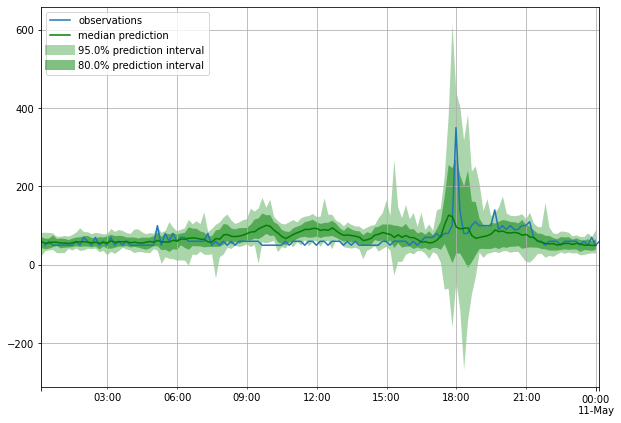

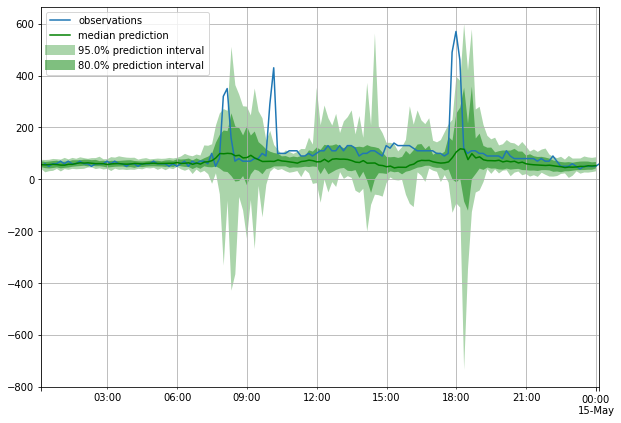

In [ ]:
plot_prob_forecast(tss[0], forecast[0])
plot_prob_forecast(tss[1], forecast[1])

In [ ]:
from gluonts.evaluation import Evaluator
evaluator = Evaluator(quantiles=[0.1,0.5, 0.9])
agg_metrics, item_metrics = evaluator(iter(tss), iter(forecast), num_series = len(test_data))

Running evaluation: 100%|██████████| 2/2 [00:00<00:00, 24.11it/s]


In [ ]:

item_metrics

,item_id,MSE,abs_error,abs_target_sum,abs_target_mean,seasonal_error,MASE,MAPE,sMAPE,ND,MSIS,QuantileLoss[0.1],Coverage[0.1],QuantileLoss[0.5],Coverage[0.5],QuantileLoss[0.9],Coverage[0.9]
0,NaN,707.343696,2500.319336,9510.0,66.041667,64.962137,0.267284,0.258313,0.231956,0.262915,1.980685,1225.074570,0.236111,2500.319530,0.631944,1232.711320,0.930556
1,NaN,6492.612847,5321.318359,14350.0,99.652778,64.259270,0.575070,0.251097,0.315676,0.370824,8.234008,1877.255754,0.000000,5321.318493,0.250000,4637.078813,0.798611


In [ ]:
import json
csv_file = "pred.json"
with open(csv_file, 'w') as writer:
    writer.write(json.dumps(agg_metrics, indent=4))

In [ ]:
training_data

Map(data=[{'start': Period('2016-01-11 17:00', '10T'), 'target': array([60., 60., 50., ..., 50., 70., 50.], dtype=float32)}])

In [ ]:
test_data

Map(data=[{'start': Period('2016-01-11 17:00', '10T'), 'target': array([60., 60., 50., ..., 70., 50., 60.], dtype=float32)}, {'start': Period('2016-01-11 17:00', '10T'), 'target': array([60., 60., 50., ..., 50., 50., 60.], dtype=float32)}])

In [ ]:
import optuna
import torch
from gluonts.torch.model.deepar import DeepAREstimator #Here chose torch.model.deepAREstimator
from gluonts.mx import Trainer
from gluonts.evaluation import Evaluator

class DeepARTuningObjective:
    def __init__(self, training_data, test_data, prediction_length, freq, metric_type="mean_wQuantileLoss"):
        self.training_data = training_data
        self.test_data = test_data
        self.prediction_length = prediction_length
        self.freq = freq
        self.metric_type = metric_type

        # entry_split = [self.split_entry(entry) for entry in self.dataset]
        # self.entry_pasts = [entry[0] for entry in entry_split]
        # self.entry_futures = [entry[1] for entry in entry_split]

    def get_params(self, trial) -> dict:
        return {
            "num_layers": trial.suggest_int("num_layers", 1, 5),
            "hidden_size": trial.suggest_int("hidden_size", 10, 50),
        }

    # def split_entry(self, entry):
    #     entry_past = {}
    #     for key, value in entry.items():
    #         if key == "target":
    #             entry_past[key] = value[: -self.prediction_length]
    #         else:
    #             entry_past[key] = value

    #     # df = pd.DataFrame(
    #     #     entry['target'],
    #     #     columns=[entry['item_id']],
    #     #     index=pd.period_range(
    #     #         start=entry['start'],
    #     #         periods=len(entry['target']),
    #     #         freq=self.freq
    #     #     )
    #     # )

    #     return entry_past, df[-self.prediction_length:]

    def __call__(self, trial):
        params = self.get_params(trial)
        estimator = DeepAREstimator(
            num_layers=params['num_layers'],
            hidden_size=params['hidden_size'],
            prediction_length=self.prediction_length,
            freq=self.freq,
            trainer_kwargs={
                "enable_progress_bar": False,
                "enable_model_summary": False,
                "max_epochs": 5,
            }
        )


        predictor = estimator.train(training_data, cache_data=True)
        #forecast_it = predictor.predict(test_data)

        #forecasts = list(forecast_it)
        forecast_it, ts_it = make_evaluation_predictions(
        dataset=test_data,  # test dataset
        predictor=predictor,  # predictor
        num_samples=100) # number of sample paths we want for evaluation)
        forecasts = list(forecast_it)
        tss = list(ts_it)
        evaluator = Evaluator(quantiles=[0.1, 0.5, 0.9])
        agg_metrics, item_metrics = evaluator(iter(tss), iter(forecasts))
        return agg_metrics[self.metric_type]

In [ ]:
import time
start_time = time.time()
study = optuna.create_study(direction="minimize")
study.optimize(
    DeepARTuningObjective(training_data, test_data,prediction_length, "10min"),
    n_trials=2
)

print("Number of finished trials: {}".format(len(study.trials)))

print("Best trial:")
trial = study.best_trial

print("  Value: {}".format(trial.value))

print("  Params: ")
for key, value in trial.params.items():
    print("    {}: {}".format(key, value))
print(time.time() - start_time)

[I 2022-07-09 08:36:39,049] A new study created in memory with name: no-name-5ab48c76-993a-44be-8166-6efe177e1af5
/usr/local/lib/python3.7/dist-packages/pytorch_lightning/utilities/parsing.py:262: UserWarning: Attribute 'model' is an instance of `nn.Module` and is already saved during checkpointing. It is recommended to ignore them using `self.save_hyperparameters(ignore=['model'])`.
  f"Attribute {k!r} is an instance of `nn.Module` and is already saved during checkpointing."
GPU available: True, used: False
TPU available: False, using: 0 TPU cores
IPU available: False, using: 0 IPUs
HPU available: False, using: 0 HPUs
/usr/local/lib/python3.7/dist-packages/pytorch_lightning/trainer/trainer.py:1817: PossibleUserWarning: GPU available but not used. Set `accelerator` and `devices` using `Trainer(accelerator='gpu', devices=1)`.
  category=PossibleUserWarning,
/usr/local/lib/python3.7/dist-packages/pytorch_lightning/trainer/configuration_validator.py:133: UserWarning: You defined a `valida

Number of finished trials: 2
Best trial:
  Value: 0.19285458027300603
  Params: 
    num_layers: 4
    hidden_size: 32
146.39620900154114


In [ ]:
## Re-training the model

estimator = DeepAREstimator(
    num_layers=trial.params["num_layers"],
    hidden_size=trial.params["hidden_size"],
    prediction_length=prediction_length,
    context_length=100,
    freq="10min",
    trainer_kwargs={
        "enable_progress_bar": False,
        "enable_model_summary": False,
        "max_epochs": 10,
    }
)

In [ ]:
predictor = estimator.train(training_data, cache_data=True)

/usr/local/lib/python3.7/dist-packages/pytorch_lightning/utilities/parsing.py:262: UserWarning: Attribute 'model' is an instance of `nn.Module` and is already saved during checkpointing. It is recommended to ignore them using `self.save_hyperparameters(ignore=['model'])`.
  f"Attribute {k!r} is an instance of `nn.Module` and is already saved during checkpointing."
GPU available: True, used: False
TPU available: False, using: 0 TPU cores
IPU available: False, using: 0 IPUs
HPU available: False, using: 0 HPUs
/usr/local/lib/python3.7/dist-packages/pytorch_lightning/trainer/trainer.py:1817: PossibleUserWarning: GPU available but not used. Set `accelerator` and `devices` using `Trainer(accelerator='gpu', devices=1)`.
  category=PossibleUserWarning,
/usr/local/lib/python3.7/dist-packages/pytorch_lightning/trainer/configuration_validator.py:133: UserWarning: You defined a `validation_step` but have no `val_dataloader`. Skipping val loop.
  rank_zero_warn("You defined a `validation_step` but 

In [ ]:
from gluonts.evaluation import make_evaluation_predictions
forecast_it, ts_it = make_evaluation_predictions(
    dataset=test_data,
    predictor=predictor
)

In [ ]:
forecasts = list(forecast_it)
tss = list(ts_it)

In [ ]:
def plot_prob_forecasts(ts_entry, forecast_entry):
    plot_length = 150
    prediction_intervals = (50.0, 90.0)
    legend = ["observations", "median prediction"] + [f"{k}% prediction interval" for k in prediction_intervals][::-1]

    fig, ax = plt.subplots(1, 1, figsize=(10, 7))
    ts_entry[-plot_length:].plot(ax=ax)  # plot the time series
    forecast_entry.plot(prediction_intervals=prediction_intervals, color='g')
    plt.grid(which="both")
    plt.legend(legend, loc="upper left")
    plt.show()

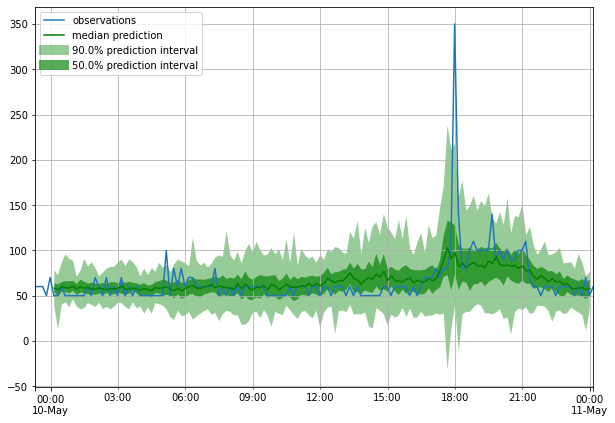

In [ ]:
plot_prob_forecasts(tss[0], forecasts[0])

In [ ]:
from gluonts.evaluation import Evaluator

In [ ]:
evaluator = Evaluator(quantiles=[0.1, 0.5, 0.9])
agg_metrics, item_metrics = evaluator(tss, forecasts)

Running evaluation: 2it [00:00, 22.27it/s]


In [ ]:

print(json.dumps(agg_metrics, indent=4))

{
    "MSE": 3395.5404188368057,
    "abs_error": 6149.138671875,
    "abs_target_sum": 23860.0,
    "abs_target_mean": 82.84722222222223,
    "seasonal_error": 64.61070327589803,
    "MASE": 0.33131195928558915,
    "MAPE": 0.17770063214831883,
    "sMAPE": 0.1981136467721727,
    "MSIS": 5.575227172494883,
    "QuantileLoss[0.1]": 2688.500619506836,
    "Coverage[0.1]": 0.006944444444444444,
    "QuantileLoss[0.5]": 6149.138751983643,
    "Coverage[0.5]": 0.40625,
    "QuantileLoss[0.9]": 5661.904768371582,
    "Coverage[0.9]": 0.9409722222222222,
    "RMSE": 58.271265807744435,
    "NRMSE": 0.703358112013009,
    "ND": 0.25771746319677286,
    "wQuantileLoss[0.1]": 0.11267814834479614,
    "wQuantileLoss[0.5]": 0.25771746655421807,
    "wQuantileLoss[0.9]": 0.2372969307783563,
    "mean_absolute_QuantileLoss": 4833.1813799540205,
    "mean_wQuantileLoss": 0.20256418189245684,
    "MAE_Coverage": 0.07592592592592591,
    "OWA": NaN
}


### 实验总结

- torch有点麻烦。看看mx能不能改
- 调参不如不调参。还是手动吧